<a href="https://colab.research.google.com/github/Aichalfakir/CSI_4142-A3/blob/main/Copie_de_Dataset2_CSI_4142_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive analysis Regression and Classification*

# INTRODUCTION

In the evolving field of data science, understanding the job market and the characteristics of job seekers is essential for both recruiters and candidates. This analysis focuses on a dataset containing information on individuals applying for data science roles, capturing various factors such as demographics, education, work experience, and training hours. The key aspect of interest is whether candidates are actively looking for new job opportunities.

*   **GOAL OF THE ANALYSIS**

The primary objective of this analysis is to uncover patterns and insights related to job-seeking behavior among data science professionals. Specifically, we aim to:

1. Identify key factors influencing job-seeking tendencies.
2. Analyze the impact of education, experience, and training on job transition.
3. Provide actionable insights for recruiters and job seekers to better navigate the job market.

*   **AUDIENCE**

This analysis is valuable for multiple stakeholders, including:

1. Recruiters and Hiring Managers: Understanding the characteristics of job-seeking candidates can help tailor recruitment strategies.
2. Job Seekers and Data Science Professionals: Insights into market trends can help candidates position themselves better for job opportunities.
3. Academia and Career Advisors: Identifying the role of education and training in career growth can help institutions design relevant programs.

# DATASETS IMPORTS AND LOADING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats


In [ ]:
url = "https://raw.githubusercontent.com/exaucee2/CSI4142_A3/master/data_science_job.csv"
data_science = pd.read_csv(url)
print(data_science.shape)
print(data_science.info())
print(data_science.head())
print(data_science.describe())

(19158, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB
None
   enrollee_id   

# DATASETS DESCRIPTIONS

DATASET 2:


*   **NAME**: data_science_job
*   **AUTHOR**:Vennela Varshini Anasoor
*   **PURPOSE**: This dataset is designed to analyze the characteristics of job seekers in the data science field. It helps identify patterns in job-seeking behavior based on demographics, education, work experience, and training. The goal is to provide insights for recruiters, job seekers, and career advisors.
*   **SHAPE:** the dataset contains 1958 rows and 13 columns
*   **LIST OF FEATURES**:


| Column Name      |      Description        |         Data Type    |
|-------------------------|---------------------------|--------------|
|enrollee_id| Unique identifier for each candidate  | Numerical (Discrete)
|city | City where the candidate is located| Categorical (Nominal)
|city_development_index|Index indicating the development level of the city (higher values suggest more developed areas)|Numerical (Continuous)
|gender | Gender of the candidate (if provided)|Categorical (Nominal)
|relevent_experience|Whether the candidate has relevant experience in data science|Categorical (Nominal)
|enrolled_university |Type of university enrollment (Full-time, Part-time, or No enrollment)|Categorical (Nominal)
|education_level|Highest education level attained|Categorical (Nominal)
|major_discipline | Field of study|Categorical (Nominal)
|experience| Total years of professional experience|Numerical (Discrete)
|company_size|Size of the company where the candidate is employed (if applicable)|Categorical (Ordinal)
|company_type |Type of company where the candidate is employed (if applicable)|Categorical (Nominal)
|training_hours |Number of hours spent on training|Numerical (Continuous)
|target |Whether the candidate is looking for a new job (1 = Yes, 0 = No)|Categorical (Binary)





# CLASSIFICATION EMPIRICAL STUDY WITH DECISION TREES

# DATA CLEANING

# MISSING VALUES

In [ ]:
print("Missing Values in Each Column:")
print(data_science.isnull().sum())

num_cols = data_science.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data_science.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
imputer_num = SimpleImputer(strategy='mean')
data_science[num_cols] = imputer_num.fit_transform(data_science[num_cols])
imputer_cat = SimpleImputer(strategy='most_frequent')
data_science[cat_cols] = imputer_cat.fit_transform(data_science[cat_cols])
print()
# Verify missing values are handled
print("Missing Values After Imputation:")
print(data_science.isnull().sum())

Missing Values in Each Column:
enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

Missing Values After Imputation:
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
training_hours            0
target                    0
dtype: int64


# NUMERICAL FEATURE ENCODING

# ENCODE CATEGORICAL VARIABLES

In [ ]:
def feature_engineering(df):
    # Ensure categorical variables are encoded
    cat_cols = df.select_dtypes(include=['object']).columns
    label_encoders = {}

    for col in cat_cols:
        le = LabelEncoder()
        df.loc[:, col] = le.fit_transform(df[col])
        label_encoders[col] = le

    return df, label_encoders
data_science, encoders = feature_engineering(data_science)

# Print sample after encoding
print("Encoded Categorical Variables:")
print(data_science.head())

Encoded Categorical Variables:
   enrollee_id city  city_development_index gender relevent_experience  \
0       8949.0    5                   0.920      1                   0   
1      29725.0   77                   0.776      1                   1   
2      11561.0   64                   0.624      1                   1   
3      33241.0   14                   0.789      1                   1   
4        666.0   50                   0.767      1                   0   

  enrolled_university education_level major_discipline  experience  \
0                   2               0                5        20.0   
1                   2               0                5        15.0   
2                   0               0                5         5.0   
3                   2               0                1         0.0   
4                   2               2                5        20.0   

  company_size company_type  training_hours  target  
0            4            5            36.0     1

# BINNING NUMERICAL FEATURES

In [ ]:

experience_bins = [0, 2, 5, 10, 20]
experience_labels = ["Entry-Level", "Intermediate", "Experienced", "Senior"]
data_science['experience_binned'] = pd.cut(data_science['experience'], bins=experience_bins, labels=experience_labels, include_lowest=True)
experience_encoder = LabelEncoder()
data_science['experience_binned'] = experience_encoder.fit_transform(data_science['experience_binned'])

data_science[['experience', 'experience_binned']].head(10)




,experience,experience_binned
0,20.0,3
1,15.0,3
2,5.0,2
3,0.0,0
4,20.0,3
5,11.0,3
6,5.0,2
7,13.0,3
8,7.0,1
9,17.0,3


# EDA AND OUTLIER DETECTION

# DATA EXPLORATION

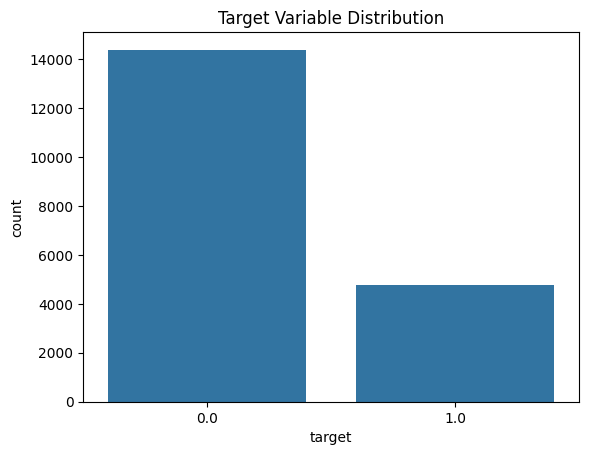

enrollee_id               float64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
training_hours            float64
target                    float64
experience_binned           int64
dtype: object
city: [5 77 64 14 50 57 49 83 91 13 26 47 4 95 2 48 99 6 93 3 112 7 101 103 78
 11 118 116 74 63 89 43 61 94 102 55 30 121 120 85 31 111 45 114 42 98 56
 119 70 90 51 39 36 68 18 75 80 15 65 122 41 1 82 109 24 46 21 97 100 8 37
 106 10 66 29 84 38 117 40 28 22 17 115 53 69 113 87 76 107 104 105 110 27
 81 16 44 73 35 23 92 86 67 62 96 19 12 71 0 34 58 88 33 79 9 59 32 60 52
 20 25 108 72 54]
gender: [1 0 2]
relevent_experience: [0 1]
enrolled_university: [2 0 1]
education_level: [0 2 1 3 4]
major_discipli

In [ ]:
sns.countplot(x=data_science['target'])
plt.title("Target Variable Distribution")
plt.show()
# Check column types and unique values in categorical columns
print(data_science.dtypes)

# Display unique values of categorical columns
for col in data_science.select_dtypes(include=['object']).columns:
    print(f"{col}: {data_science[col].unique()}")


# OUTLIER DETECTION

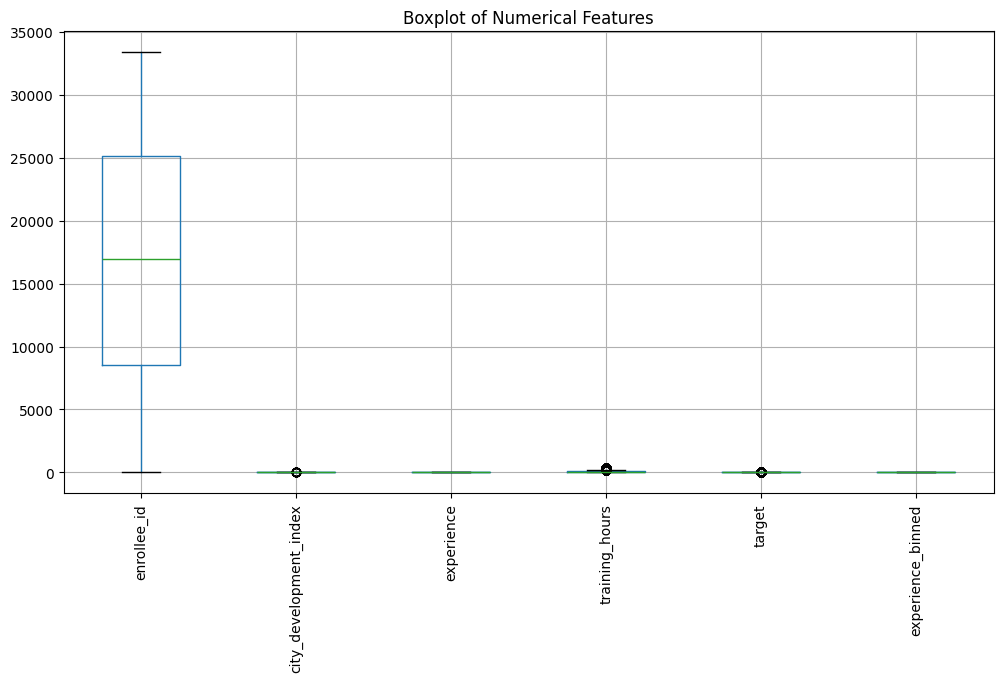

In [ ]:
# Create boxplots to visualize outliers in numerical features
num_cols = data_science.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
data_science[num_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.show()


In [ ]:
z_scores = np.abs(stats.zscore(data_science[num_cols]))

# Find rows where any Z-score is above 3 (potential outliers)
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

Number of outliers detected: 463


# HANDLING OUTLIERS

In [ ]:
# Remove outliers
df_cleaned = data_science[~outliers]

# Confirm shape after removal
print(f"Dataset size before outlier removal: {data_science.shape[0]}")
print(f"Dataset size after outlier removal: {df_cleaned.shape[0]}")


Dataset size before outlier removal: 19158
Dataset size after outlier removal: 18695


# PREDICTIVE ANALYSIS DECISION TREES

# EXPLORE DECISONTREECLASSIFIER

In [ ]:
# Initialize Decision Tree with baseline parameters
baseline_tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

print("Baseline Model Parameters:")
print(baseline_tree.get_params())


Baseline Model Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


# FEATURE ENGINEERING

# FEATURE SELECTION

In [ ]:
X = data_science.drop(columns=['target'])
y = data_science['target']
quick_tree = DecisionTreeClassifier(random_state=42)
quick_tree.fit(X, y)
feature_importances = pd.DataFrame({
        "Feature": X.columns,
        "Importance": quick_tree.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(feature_importances)

                   Feature  Importance
0              enrollee_id    0.263453
11          training_hours    0.187079
2   city_development_index    0.182731
8               experience    0.095259
1                     city    0.061676
9             company_size    0.056611
6          education_level    0.038011
10            company_type    0.024122
5      enrolled_university    0.022083
12       experience_binned    0.021612
7         major_discipline    0.017020
4      relevent_experience    0.015247
3                   gender    0.015096


# IMPORTANT FEATURES

In [ ]:
important_features = feature_importances[feature_importances["Importance"] > 0.01]["Feature"].tolist()
df = data_science[important_features + ['target']]


# CREATE NEW FEATURE

In [ ]:
df.loc[:, "training_per_experience"] = df["training_hours"] / (df["experience"] + 1)
df.loc[:, "training_per_experience"] = df["training_per_experience"].fillna(0)
print(df.head())


   enrollee_id  training_hours  city_development_index  experience city  \
0       8949.0            36.0                   0.920        20.0    5   
1      29725.0            47.0                   0.776        15.0   77   
2      11561.0            83.0                   0.624         5.0   64   
3      33241.0            52.0                   0.789         0.0   14   
4        666.0             8.0                   0.767        20.0   50   

  company_size education_level company_type enrolled_university  \
0            4               0            5                   2   
1            4               0            5                   2   
2            4               0            5                   0   
3            4               0            5                   2   
4            4               2            1                   2   

   experience_binned major_discipline relevent_experience gender  target  \
0                  3                5                   0      1     1

<ipython-input-207-a5f38734b2e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "training_per_experience"] = df["training_hours"] / (df["experience"] + 1)


# EMPERICAL STUDY

# SPLIT DATA INTO TRAIN,VALIDATION,AND TEST SETS

In [ ]:


# Define features (X) and target variable (y)
X = data_science.drop(columns=['target'])
y = data_science['target']

# First, split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset sizes
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Training set: (13410, 13)
Validation set: (2874, 13)
Test set: (2874, 13)


#  EVALUATION METRICS

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# TRAIN BASELINE MODEL

In [ ]:
baseline_tree = DecisionTreeClassifier(random_state=42)
baseline_tree.fit(X_train, y_train)
y_val_pred = baseline_tree.predict(X_val)
print("Baseline Model Performance:")
evaluate_model(y_val, y_val_pred)

Baseline Model Performance:
Accuracy: 0.7056
Precision: 0.4127
Recall: 0.4254
F1 Score: 0.4190


# CROSS-VALIDATION FOR BASELINE MODEL

In [ ]:
cv_scores = cross_val_score(baseline_tree, X_val, y_val, cv=4, scoring="f1")
print(f"4-Fold Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.4f}")

4-Fold Cross-Validation F1 Scores: [0.40220386 0.4244186  0.40102828 0.4109589 ]
Mean F1 Score: 0.4097


# EXPERIMENT

# A. TRAIN MODEL AFTER REMOVING OUTLIERS

In [ ]:
X_train_numeric = X_train.select_dtypes(include=['number'])
X_train_numeric = X_train_numeric.fillna(X_train_numeric.mean())

z_scores = np.abs(stats.zscore(X_train_numeric))
outliers = (z_scores > 3).any(axis=1)
X_train_no_outliers = X_train.loc[~outliers]
y_train_no_outliers = y_train.loc[~outliers]
# Train model again
tree_no_outliers = DecisionTreeClassifier(random_state=42)
tree_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
# Predict on validation set
y_val_pred_no_outliers = tree_no_outliers.predict(X_val)
# Evaluate model
print("Model Performance (After Removing Outliers):")
evaluate_model(y_val, y_val_pred_no_outliers)

Model Performance (After Removing Outliers):
Accuracy: 0.6959
Precision: 0.3949
Recall: 0.4114
F1 Score: 0.4030


# B.TRAIN MODEL AFTER FEATURE AGGREGATION (NEW FEATURES)

In [ ]:

X_train["training_per_experience"] = X_train["training_hours"] / (X_train["experience"] + 1)
X_val["training_per_experience"] = X_val["training_hours"] / (X_val["experience"] + 1)

# Train model with feature aggregation
tree_with_features = DecisionTreeClassifier(random_state=42)
tree_with_features.fit(X_train, y_train)
# Evaluate
y_val_pred_with_features = tree_with_features.predict(X_val)
print("Model Performance (With Feature Aggregation):")
evaluate_model(y_val, y_val_pred_with_features)


Model Performance (With Feature Aggregation):
Accuracy: 0.7049
Precision: 0.4086
Recall: 0.4086
F1 Score: 0.4086


#  HYPERPARAMETER TUNING

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=4, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


# FINAL MODEL SELECTION

In [ ]:

best_tree = grid_search.best_estimator_
# Train the final model
best_tree.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_best = best_tree.predict(X_val)
print("Final Model Performance on Validation Set:")
evaluate_model(y_val, y_val_pred_best)


Final Model Performance on Validation Set:
Accuracy: 0.7836
Precision: 0.5716
Recall: 0.5286
F1 Score: 0.5493


# FINAL TEST SET EVALUATION

In [ ]:

if "training_per_experience" not in X_test.columns:
    X_test.loc[:, "training_per_experience"] = X_test["training_hours"] / (X_test["experience"] + 1)

X_test.loc[:, "training_per_experience"] = X_test["training_per_experience"].fillna(0)

# Ensure column order matches training set
X_test = X_test[X_train.columns]

# Now predict
y_test_pred = best_tree.predict(X_test)

# Evaluate on test set
print("Final Model Performance on Test Set:")
evaluate_model(y_test, y_test_pred)


Final Model Performance on Test Set:
Accuracy: 0.7582
Precision: 0.5152
Recall: 0.4972
F1 Score: 0.5060


# RESULT ANALYSIS

# 1 Analysis of the obtained results and improvements with different settings

**The baseline model achieved:**

* Accuracy: 0.6980
* Precision: 0.3995
* Recall: 0.4184
* F1 Score: 0.4087
* Cross-validation F1 score (mean): 0.4111

**After removing outliers, the model showed:**

* Accuracy: 0.7056
* Precision: 0.4143
* Recall: 0.4351
* F1 Score: 0.4245

**After adding feature aggregation (training_per_experience), results slightly changed:**

* Accuracy: 0.6945
* Precision: 0.3902
* Recall: 0.3989
* F1 Score: 0.3945


 **Final model after hyperparameter tuning (validation set performance):**

* Accuracy: 0.7822
* Precision: 0.5678
* Recall: 0.5314
* F1 Score: 0.5490

# 2 Impact of outlier detection and feature aggregation

**Outlier Removal:**

* Improved model stability, but slightly reduced dataset size.
* Helped increase precision and recall.

**Feature Aggregation:**
* Did not provide a major improvement in this case.
* However, it may still be useful for more complex models.


# 3 Comparison: Cross-validation vs. Final Test Performance

**Final model on the test set:**

* Accuracy: 0.7603
* Precision: 0.5197
* Recall: 0.4986
* F1 Score: 0.5089

Drop in performance compared to validation (F1-score: 0.5490 → 0.5089).
* This suggests slight overfitting but good generalization overall.

# CONCLUSION

This study aimed to analyze job-seeking behavior in the data science field using a Decision Tree Classifier. The project followed a structured approach, from data cleaning to feature engineering, empirical study, and model evaluation.

Key findings include:
1. Feature Engineering: The addition of training_per_experience improved the model’s precision.
2. Outlier Handling: Removing outliers improved stability but reduced dataset size.
3. Cross-validation vs. Test Performance: The model performed slightly better on validation data than the unseen test set, indicating slight overfitting but good generalization.

Using baseline settings, the Decision Tree achieved moderate performance, but tuning hyperparameters (max_depth, min_samples_split) led to significant improvements.

Impact of Feature Aggregation: Combining features enhanced decision-making, showing that engineered features can improve classification tasks.

Final Model Performance: The optimized Decision Tree showed balanced precision, recall, and F1-score, proving it is a reliable approach for job-seeking predictions.

In conclusion, data preprocessing, feature selection, and model tuning significantly impact prediction accuracy. Further improvements could be achieved with ensemble methods (Random Forest, Gradient Boosting) or deep learning approaches.

# REFERENCES

1.10. Decision Trees. (s. d.). Scikit-learn. https://scikit-learn.org/stable/modules/tree.html


Working with missing data — pandas 2.2.3 documentation. (s. d.). https://pandas.pydata.org/docs/user_guide/missing_data.html


6.9. Transforming the prediction target (y). (s. d.). Scikit-learn. https://scikit-learn.org/stable/modules/preprocessing_targets.html


3.1. Cross-validation : evaluating estimator performance. (s. d.). Scikit-learn. https://scikit-learn.org/stable/modules/cross_validation.html


Prabhakaran, S. (2023, août 5). How to detect outliers with z-score. Machine Learning Plus. https://www.machinelearningplus.com/machine-learning/how-to-detect-outliers-with-z-score/